In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [2]:
# read historical data

df=pd.read_csv('weather_forecast_data.csv')

In [3]:
df.shape

(2500, 6)

In [4]:
df.isnull().mean()

Temperature    0.0
Humidity       0.0
Wind_Speed     0.0
Cloud_Cover    0.0
Pressure       0.0
Rain           0.0
dtype: float64

In [5]:
# df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [9]:
# converting categorical data to numerical
le=LabelEncoder()

df['Rain']=le.fit_transform(df['Rain'])
#1 --> Rain
#0 --> no Rain


In [10]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336,0.125600
std,7.326996,19.954739,5.780316,29.123104,20.196433,0.331464
min,10.001842,30.005071,0.009819,0.015038,980.014486,0.000000
25%,16.359398,47.339815,4.761909,23.900016,996.938630,0.000000
50%,22.536448,63.920797,9.908572,49.488284,1013.433035,0.000000
75%,28.976476,81.561021,14.948408,75.324140,1031.735067,0.000000
max,34.995214,99.997481,19.999132,99.997795,1049.985593,1.000000


In [11]:
df.head(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1


In [12]:
df['Rain'].value_counts()


Rain
0    2186
1     314
Name: count, dtype: int64

In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # For a Random Forest model
# feature_importance = model.feature_importances_
# features = x.columns
# plt.figure(figsize=(10,5))
# sns.barplot(x=feature_importance, y=features)
# plt.title("Feature Importance")


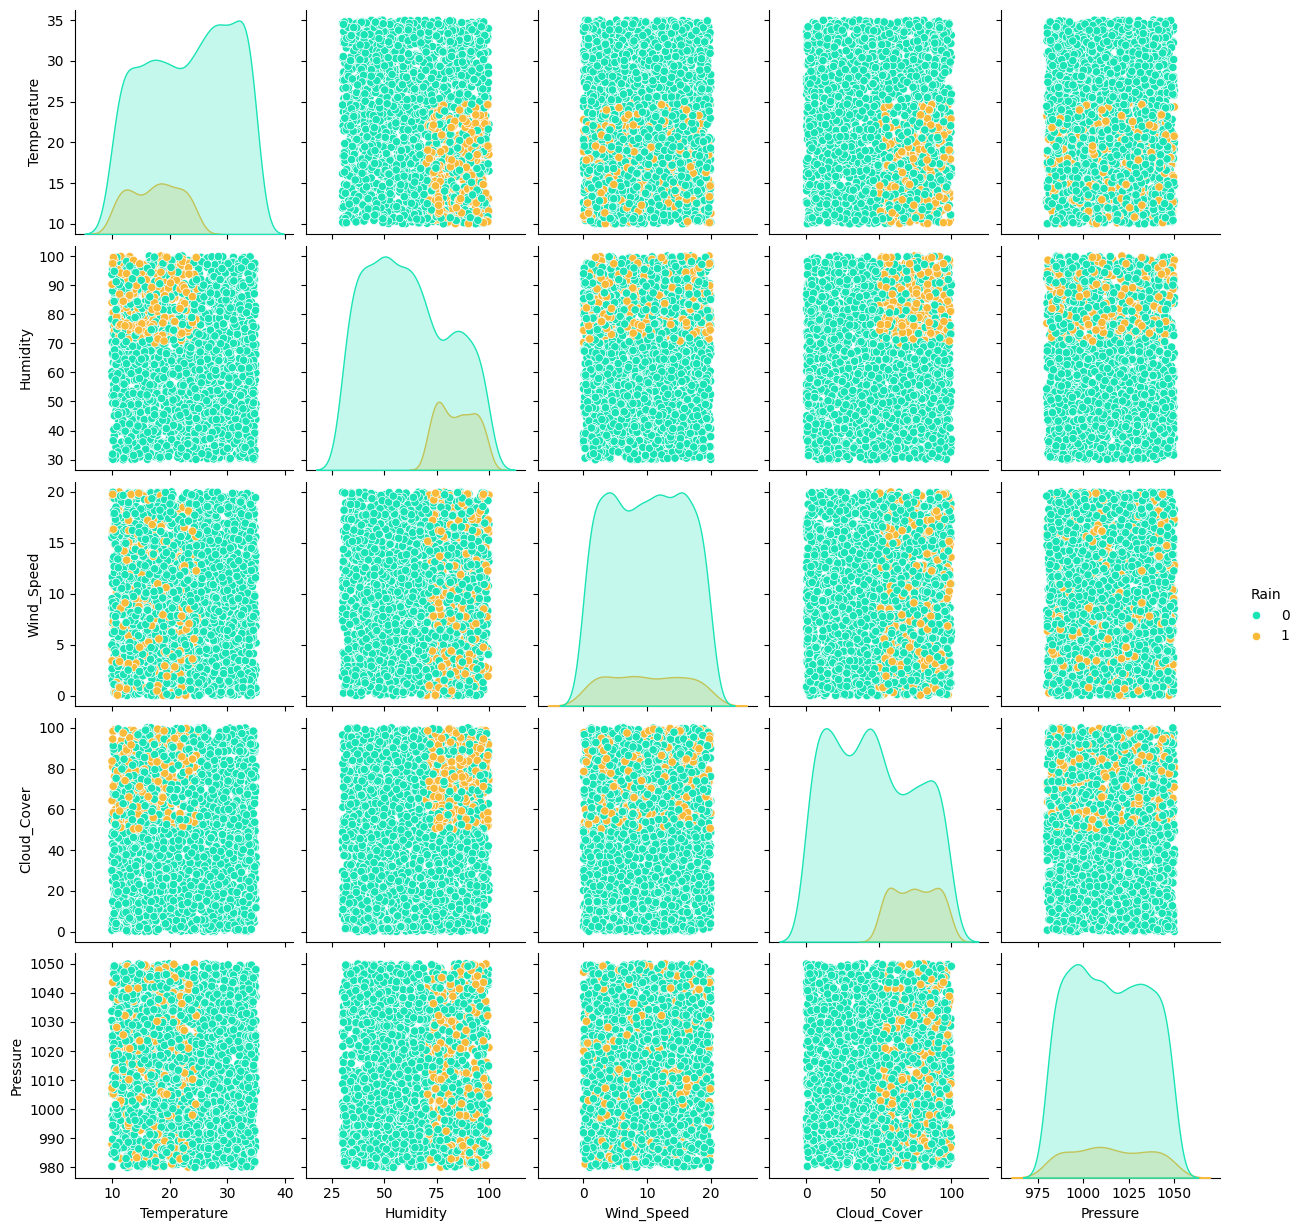

In [14]:
import seaborn as sns

sns.pairplot(df, hue = "Rain", palette = "turbo")

In [15]:
# splitiing the data
from imblearn.over_sampling import SMOTE

x=df.drop(columns=['Rain'])
y=df['Rain']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

#applying smote technique
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [16]:
y_train_resampled.value_counts()


Rain
0    1749
1    1749
Name: count, dtype: int64

In [17]:
x_train_resampled.skew().sort_values(ascending=False)

Temperature    0.507596
Pressure       0.086305
Wind_Speed     0.032214
Cloud_Cover   -0.591615
Humidity      -0.651428
dtype: float64

In [18]:

#  taning the model
# random forest
model = RandomForestClassifier(n_estimators=21,random_state=42,class_weight='balanced')
model.fit(x_train_resampled,y_train_resampled)


#  prediction
y_pred=model.predict(x_test)

print("accuracy: ",accuracy_score(y_test, y_pred))


# mean squared error
print("mean squared error :")
print(mean_squared_error(y_test,y_pred))


accuracy:  0.998
mean squared error :
0.002


In [19]:
from sklearn.metrics import f1_score, classification_report

f1=f1_score(y_pred,y_test)
print("F1 Score:", f1)

print(classification_report(y_test, y_pred))

F1 Score: 0.9921259842519685
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       0.98      1.00      0.99        63

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [20]:
import pickle
with open('rain_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as 'rain_model.pkl'")

Model saved as 'rain_model.pkl'


In [21]:
df.head(1)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1


# Now working with realtime data


In [22]:
import requests

api_key ='e3ebc63fa8d066ecd56de1c8cbe220a0'
base_url='https://api.openweathermap.org/data/2.5/'

# Fetch current weather data
def get_weather_data(city):
  url = f"{base_url}weather?q={city}&appid={api_key}&units=metric"
  response=requests.get(url)
  data = response.json()
  if response.status_code != 200:
    print("Error fetching weather data")
    return None

  weather_data=  {
      'city' : data['name'],
      'feels_like': round(data['main']['feels_like']),
      'Temperature': round(data['main']['temp']),
      'Humidity' : round(data['main']['humidity']),
      'Wind_Speed' : data['wind']['speed'],
      'Cloud_Cover' : data['clouds']['all'],
      'Pressure' : data['main']['pressure'],
      'country' : data['sys']['country'],


  }
  return weather_data

In [23]:
with open('rain_model.pkl', 'rb') as f:
  model=pickle.load(f)

def predict_rain(data,model):
  data=pd.DataFrame([data])

  data = data.drop(columns=['city','country','feels_like'])
  prediction=model.predict(data)
  return "Yes" if prediction[0] == 1 else "No"

In [24]:
def main():
  city = input("enter city name: ")
  weather_data = get_weather_data(city)
  if weather_data is None:
    return

  for key, value in weather_data.items():
    print(f"{key}: {value}")

  rain_result=predict_rain(weather_data,model)

  print("\n Will it rain tomorrow in ",city, "?", rain_result)


In [26]:
main()

enter city name:  cape town


city: Cape Town
feels_like: 13
Temperature: 15
Humidity: 56
Wind_Speed: 2.56
Cloud_Cover: 97
Pressure: 1021
country: ZA

 Will it rain tomorrow in  cape town ? No
